# PROJET « dur » : prédiction de match de ligue1

Le but du projet est de prédire le résultat (victoire, nul, défaite) des matchs de ligue 1 sur la saison en cours (2023-2024).

In [18]:
#importation des librairie
import numpy as np
import pandas as pd 
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sb


### Importation

In [13]:
clubs = pd.read_csv("data/clubs_fr.csv", sep=",") # Une liste des clubs français avec quelques stats sur la constitution (récente) de l’équipe
game_events = pd.read_csv("data/game_events.csv", sep=",") # Un ensemble d’actions pour chaque joueur pendant chaque match
game_lineups = pd.read_csv("data/game_lineups.csv", sep=",", low_memory=False) # La constitution des équipes pour chaque match
match2023 = pd.read_csv("data/match_2023.csv", sep=",") # matchs a predir
matchs = pd.read_csv("data/matchs_2013_2022.csv", sep=",") #matchs de 2013 a 2022
player_appearance = pd.read_csv("data/player_appearance.csv", sep=",") # Un ensemble d’info simple sur chaque joueur pendant chaque match
pre_season = pd.read_csv("data/player_valuation_before_season.csv", sep=",") # Pour chaque joueur, sa valeur sur le marché, à une certaine date

### Nettoyage 

In [ ]:
clubs.dropna(axis=0, how="all")
clubs.dropna(axis=1, how="all")

game_events.dropna(axis=0, how="all")
game_events.dropna(axis=1, how="all")

game_lineups.dropna(axis=0, how="all")
game_lineups.dropna(axis=1, how="all")

matchs.dropna(axis=0, how="all")
matchs.dropna(axis=1, how="all")

player_appearance.dropna(axis=0, how="all")
player_appearance.dropna(axis=1, how="all")

pre_season.dropna(axis=0, how="all")
pre_season.dropna(axis=1, how="all")

### Exploration

#### Performances à domicile et à l'exterieur

On va voir si l'endroit oû le match est disputé influe sur les buts et les victoires.

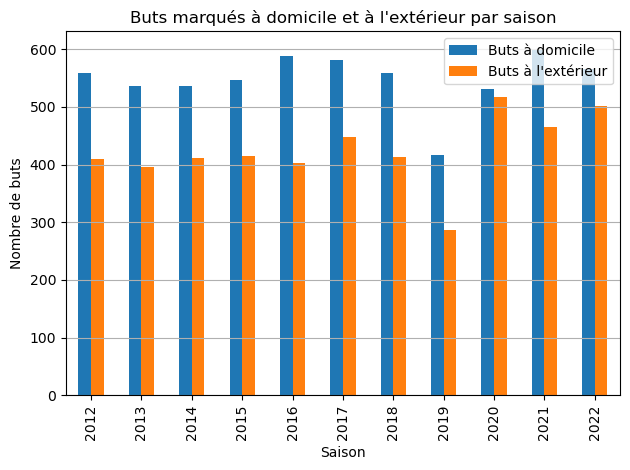

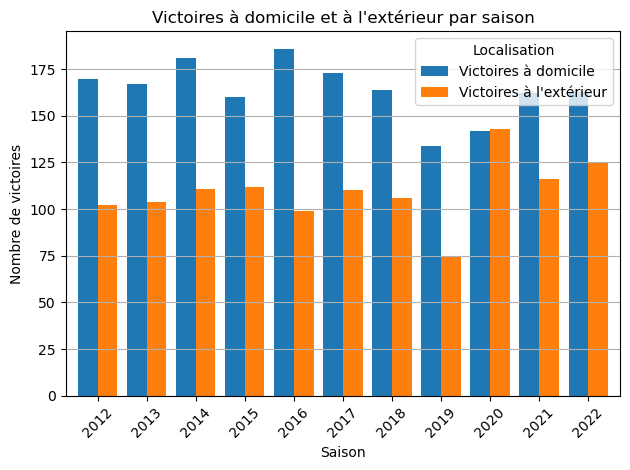

Pourcentage de différence moyen entre les victoires à domicile et à l'extérieur : 14.845087317033416


In [38]:
goals_by_season = matchs.groupby('season')[['home_club_goals', 'away_club_goals']].sum()
home_wins_by_season = matchs.loc[matchs['results'] == 1].groupby('season').size()
away_wins_by_season = matchs.loc[matchs['results'] == -1].groupby('season').size()
wins_by_season = pd.concat([home_wins_by_season, away_wins_by_season], axis=1)
wins_by_season.columns = ['Victoires à domicile', 'Victoires à l\'extérieur']

# Plot 1
goals_by_season.plot(kind='bar')
plt.title('Buts marqués à domicile et à l\'extérieur par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de buts')
plt.legend(['Buts à domicile', 'Buts à l\'extérieur'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Plot 2
wins_by_season.plot(kind='bar', width=0.8)
plt.title('Victoires à domicile et à l\'extérieur par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de victoires')
plt.xticks(rotation=45)
plt.legend(title='Localisation')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


wins_diff_by_season = home_wins_by_season - away_wins_by_season
total_matches_by_season = matchs.groupby('season').size()
percentage_diff_by_season = (wins_diff_by_season / total_matches_by_season) * 100
average_percentage_diff = percentage_diff_by_season.mean()

print("Pourcentage de différence moyen entre les victoires à domicile et à l'extérieur :", average_percentage_diff)


On observe graphiquement une différence nette de victoire entre les matchs à domicile et à l'extérieur, sauf pour l'année 2020, avec un public était absent, oû le nombre de but et de victoire à domicile et à l'exterieur sont presque egaux. Aussi, apès calcul, on observe une hausse des victoire à domicile d'environ 15% par rapport aux victoire à l'exterieur. On en conclut que le public à un impacte non négligeable sur l'issue du match.